In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

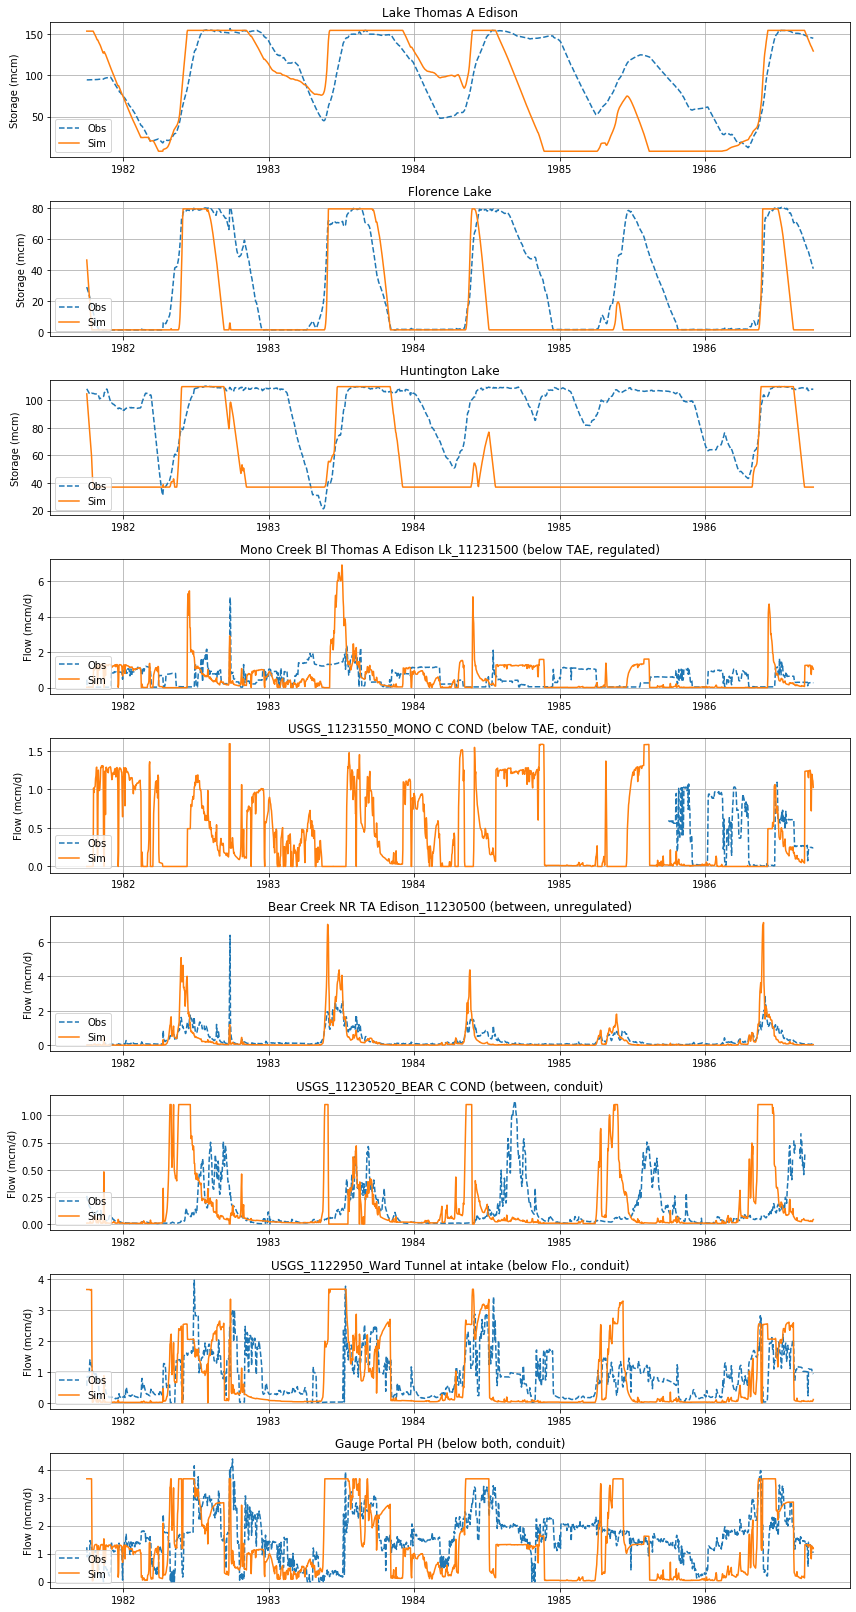

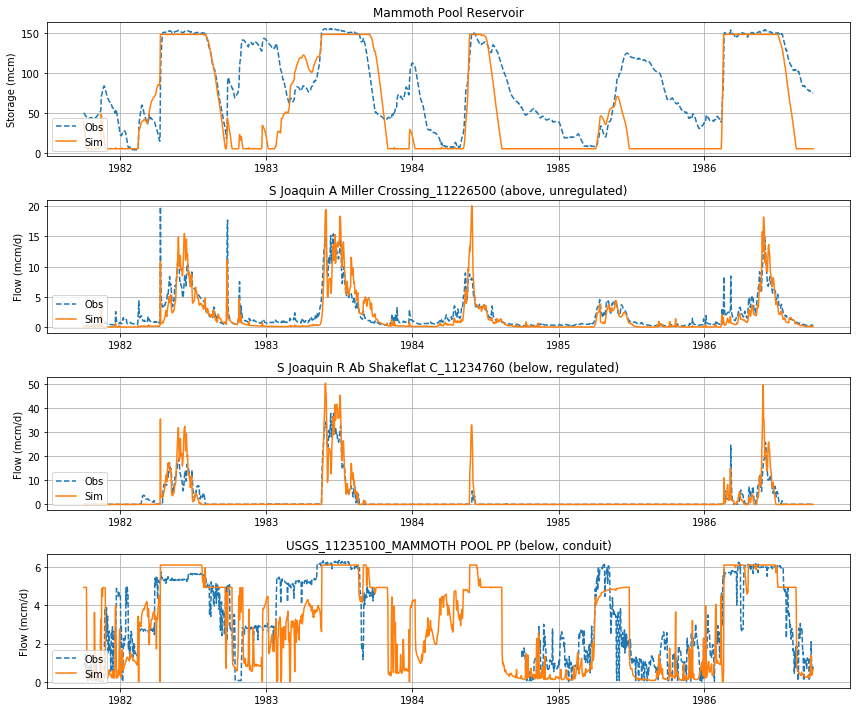

In [82]:
kwargs = dict(parse_dates=True, index_col=0)
sim = pd.read_csv('./results/flow.csv', **kwargs)
obs = pd.read_csv('./results/observed flow.csv', **kwargs)
ssim = pd.read_csv('./results/storage.csv', **kwargs)
sobs = pd.read_csv('./results/observed storage.csv', **kwargs)
runoff = pd.read_csv('./results/runoff.csv', **kwargs)
req = pd.read_csv('./results/requirement.csv', **kwargs)

# diagnostics
def make_subsystem_graphs(reservoirs, gauges, title):
    N_gauges = 0
    for g in gauges:
        N_gauges += len(gauges[g])
    N_reservoirs = len(reservoirs)
    N = N_gauges + N_reservoirs
    fig, axes = plt.subplots(N, 1, figsize=(12, 2.5 * N))

    n = -1
    for i, r in enumerate(reservoirs):
        n += 1
        ax = axes[n]
        ax.plot(sobs.index, sobs[r], linestyle='--', label='Obs')
        ax.plot(ssim.index, ssim[r], linestyle='-', label='Sim')
        ax.set_title(r)
        ax.set_ylabel('Storage (mcm)')
        ax.legend(loc='lower left')
        ax.grid()

    for group in gauges:
        for g in gauges[group]:
            n += 1
            ax = axes[n]
            ax.plot(obs.index, obs[g], linestyle='--', label='Obs')
            ax.plot(sim.index, sim[g], linestyle='-', label='Sim')
            ax.set_title('{} ({})'.format(g, group))
            ax.set_ylabel('Flow (mcm/d)')
            ax.legend(loc='lower left')
            ax.grid()
#     fig.suptitle(title)
    plt.tight_layout()
    fig.savefig(title + '.png', dpi=300)
    plt.show()
    # plt.clf()

reservoirs = ['Lake Thomas A Edison', 'Florence Lake', 'Huntington Lake']
gauges = {
    'below TAE, regulated': ['Mono Creek Bl Thomas A Edison Lk_11231500'],
    'below TAE, conduit': ['USGS_11231550_MONO C COND'],
    'between, unregulated': ['Bear Creek NR TA Edison_11230500'],
    'between, conduit': ['USGS_11230520_BEAR C COND'],
    'below Flo., conduit': ['USGS_1122950_Ward Tunnel at intake'],
    'below both, conduit': ['Gauge Portal PH']
}
make_subsystem_graphs(reservoirs, gauges, 'Lake Thomas A Edison & Florence Lake')

# reservoirs = ['Huntington Lake']
# gauges = {
#     'above, conduit': ['Gauge Portal PH'],
#     'below, conduit': ['USGS_11238100_BIG C PH NO1']
# }
# make_subsystem_graphs(reservoirs, gauges, 'Huntington Lake')
    
reservoirs = ['Mammoth Pool Reservoir']
gauges = {
    'above, unregulated': ['S Joaquin A Miller Crossing_11226500'],
    'below, regulated': ['S Joaquin R Ab Shakeflat C_11234760'],
    'below, conduit': ['USGS_11235100_MAMMOTH POOL PP']
}
make_subsystem_graphs(reservoirs, gauges, 'Mammoth Pool Reservoir')

# Power plants
# ph_obs = [n for n in obs.columns if ('PH' in n or 'PP' in n) and '/observed flow' in n]
# ph_sim = [n.replace('/observed flow', '/flow') for n in ph_obs]
# N = len(ph_obs)
# fig2, axes2 = plt.subplots(N, 1, figsize=(12, 2*N))
# for i, n in enumerate(ph_obs):
#     ax = axes2[i]
#     ax.plot(obs.index, obs[ph_obs[i]], linestyle='--', label='Obs')
#     ax.plot(sim.index, sim[ph_sim[i]], linestyle='-', label='Obs')
#     ax.legend(loc='lower left')
#     ax.set_title(n.split('/')[1])
#     ax.set_ylabel('Flow (mcm/d)')
# plt.tight_layout()
# fig2.savefig('powerplants.png', dpi=300)
# plt.show()

# obs_res_names = [n for n in results.columns if '/observed storage' in n]
# sim_res_names = [n.replace('/observed storage', '/storage') for n in obs_res_names]
# N = len(obs_res_names)
# fig3, axes3 = plt.subplots(N, 1, figsize=(10, 2*N))
# for i, n in enumerate(obs_res_names):
#     ax = axes3[i]
#     results[n].plot(ax=ax, label='Obs')
#     results[sim_res_names[i]].plot(ax=ax, label='Sim')
#     ax.legend()
#     ax.set_ylabel('Storage ($million\\,m^3$)')
#     ax.set_title(n.split('/')[1])
# plt.tight_layout()
# fig3.savefig('storage.png', dpi=300)

# plt.show()


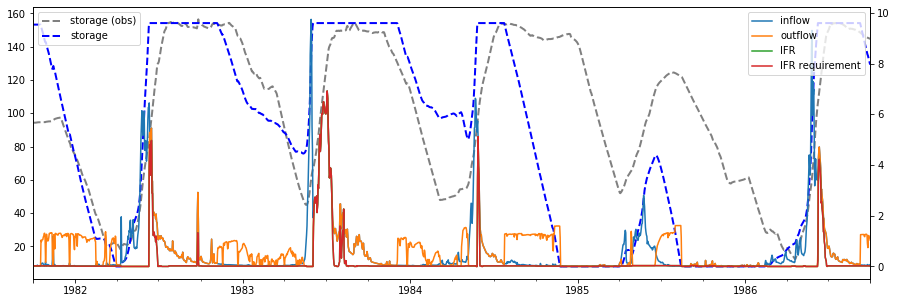

In [83]:
fig, ax = plt.subplots(figsize=(15, 5))
ax2 = ax.twinx()
sobs['Lake Thomas A Edison'].plot(ax=ax, label='storage (obs)', linewidth=2, color='grey', linestyle='--')
ssim['Lake Thomas A Edison'].plot(ax=ax, label='storage', linewidth=2, color='blue', linestyle='--')
runoff['SJN_31 Headflow'].plot(ax=ax2, label='inflow')
sim['Mono Creek Bl Thomas A Edison Lk_11231500'].plot(ax=ax2, label='outflow')
sim['IFR bl Mono Creek Div'].plot(ax=ax2, label='IFR')
sim['IFR bl Mono Creek Div'].plot(ax=ax2, label='IFR requirement')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

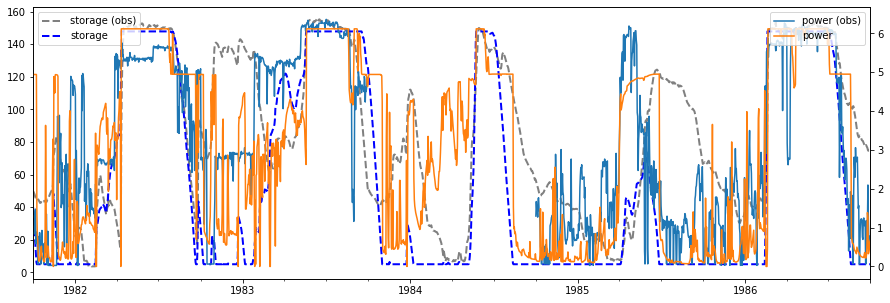

In [84]:
fig, ax = plt.subplots(figsize=(15, 5))
ax2 = ax.twinx()
sobs['Mammoth Pool Reservoir'].plot(ax=ax, label='storage (obs)', linewidth=2, color='grey', linestyle='--')
ssim['Mammoth Pool Reservoir'].plot(ax=ax, label='storage', linewidth=2, color='blue', linestyle='--')
obs['USGS_11235100_MAMMOTH POOL PP'].plot(ax=ax2, label='power (obs)')
sim['USGS_11235100_MAMMOTH POOL PP'].plot(ax=ax2, label='power')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')